In [ ]:
pip install torch torchvision

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor #where tensor is an n-dimentional matrix


In [ ]:
train_data=datasets.MNIST(
    root='data',
    train=True,
    transform =ToTensor(),
    download=True
)
test_data=datasets.MNIST(
    root='data',
    train=False,
    transform =ToTensor(),
    download=True
)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_data.targets.size()

torch.Size([60000])

In [ ]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
from torch.utils.data import DataLoader
loaders={
    'train':DataLoader(train_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),
    'test':DataLoader(test_data,
                      batch_size=100,
                      shuffle=True,
                      num_workers=1),
}

In [ ]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7b5ec3c41360>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7b5ec3c412a0>}

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init()
    self.conv1=nn.Conv2d(1,10,kernel_size=5)
    self.conv2=nn.Conv2d(10,20,kernel_size=5)
    self.cov2_drop=nn.Droupout2d()
    self.fc1=nn.Linear(320,50)
    self.fc2=nn.Linear(50,10)

   #forward function defines the activations
  def forward(self,x):
    x=F.relu(F.max_pool2d(self.conv1(x),2))
    x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x=x.view(-1,320)
    x=F.relu(self.fc1(x))
    x=F.dropout(x,training=self.training)
    x=self.fc2(x)

    return F.softmax(x)

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)  #gives the currently available device (cuda or cpu)

cpu


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
#what is cuda:CUDA (Compute Unified Device Architecture) is a parallel computing platform and an application programming interface (API) model
#created by NVIDIA.It enables developers to perform general-purpose parallel computing using NVIDIA GPUs (Graphics Processing Units).
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init()
    self.conv1=nn.Conv2d(1,10,kernel_size=5)
    self.conv2=nn.Conv2d(10,20,kernel_size=5)

optimizer = optim.Adam(model.parameters(), lr=0.001) #optimizer is initialized with a learning rate 0.0001
loss_fn = nn.CrossEntropyLoss()

#training process
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()  # Clear gradients
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')
#testing process
def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
       #accuracy= correct/total instances
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)}({100.* correct /len(loaders["test"].dataset):.0f}%\n)')

In [ ]:
epochs = 10
for epoch in range(epochs):
    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [ ]:
device

device(type='cpu')

Prediction: 1


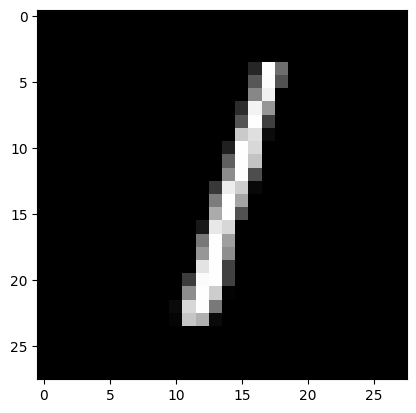

In [ ]:
import matplotlib.pyplot as plt
model. eval()
data, target = test_data[3]
data = data. unsqueeze(0). to(device)
output = model (data)
prediction = output.argmax (dim= 1, keepdim =True).item()
print(f'Prediction: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image,cmap='gray')
plt.show()

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Total Test Samples: {total}')
print(f'Correct Predictions: {correct}')
print(f'Accuracy: {100 * correct / total:.2f}%')


Total Test Samples: 10000
Correct Predictions: 9795
Accuracy: 97.95%
